# Parcial #1 - Analítica de Datos
- *Autor:* David Santiago Barreto Mora
- *Fecha:* 4/09/2023
- *Profesor:* Jhon Jairo Corredor
---

## Punto 2 - Carga de Fuente de Datos
### 2.b Escribir en secciones de texto del cuaderno python, brevemente la utilidad de las siguientes bibliotecas en azul:

1) **Random Forest Classifier:** La biblioteca permite usar el clasificador "Random Forest". El clasificador es una técnica de aprendizaje de máquina que suele implementarse utilizando bibliotecas como Scikit-Learn en Python. Este es un algoritmo de Machine Learning que ajusta una serie de árboles de decisión a varias submuestras del conjunto de datos y utiliza el promediado para mejorar la precisión predictiva y controlar el sobreajuste. Su principal utilidad radica en su papel como método de aprendizaje conjunto tanto para tareas de clasificación como de regresión. Random Forest funciona según el principio de construir múltiples árboles de decisión durante el entrenamiento y combinar sus resultados para mejorar el rendimiento predictivo general. Para tareas de clasificación, asigna una etiqueta de clase a los datos de entrada sumando el voto mayoritario de los árboles de decisión que lo componen. 

2) **Stochastic Gradient Descent Classifier:** El Clasificador de Descenso Gradiente Estocástico (SGD) es un algoritmo de optimización de aprendizaje automático empleado en varias bibliotecas, incluyendo Scikit-Learn. Su principal utilidad gira en torno a la optimización, específicamente para el entrenamiento de modelos de clasificación. Este algoritmo de optimización encuentra los valores de los parámetros de una función que minimiza una función de coste. Puede ajustarse a clasificadores lineales con funciones de pérdida convexas, como SVM y regresión logística. Es eficaz y fácil de aplicar, pero requiere ajustar algunos hiperparámetros y el escalado de características.

3) **Support Vector Classifier (SVC):** El clasificador de vectores de soporte (SVC) es otra herramienta de machine learning que suele estar disponible en bibliotecas como Scikit-Learn. Su principal utilidad reside en las tareas de clasificación supervisada binaria y multiclase. El SVC trata de encontrar un hiperplano que separe eficazmente los puntos de datos en clases distintas al tiempo que maximiza el margen entre estas clases. Este énfasis en la maximización del margen hace que el SVC sea robusto a los valores atípicos y adecuado para escenarios en los que es esencial una clara separación de clases. Además, el SVC puede emplear varias funciones de núcleo, como núcleos lineales, polinómicos o de función de base radial, para manejar límites de decisión complejos y no lineales. Además, el SVC ofrece parámetros de regularización que permiten encontrar un equilibrio entre la consecución de un margen más amplio y la minimización de los errores de clasificación, lo que lo hace versátil a la hora de abordar diversos retos de clasificación. Es eficaz en espacios de alta dimensión, pero puede ser lento en grandes conjuntos de datos.


### 2.c Importar al cuaderno las bibliotecas anteriores

In [25]:
# We import the 3 libraries mentioned
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# Also we import libraries that are essential to data manipulation and visualization
# Data manipulation 
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

### 2.d Cargar desde el ENLACE , a objeto dataframe el fichero csv de calidad del vino.

In [21]:
# Usamos la URL para cargar el CSV, y posteriormente usarlo para crear el dataframe.
url = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/winequality-red.csv"
wineDF = pd.read_csv(url, header=0, sep=";")

wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.e Presentar información sobre las columnas de los datos de la calidad del vino.
Usamos los atributos '.shape' y '.columns', junto con la función '.info()' para presentar la información esencial del dataframe. Nombres de las columnas, tipo de dato de las columns y tamaño del dataframe.

In [22]:
print("Nombres de columnas:")
print(wineDF.columns)

print("\n Informacion sobre las columnas:")
print(wineDF.info())

print("\n Tamaño del dataframe (filas, columnas):")
print(wineDF.shape)

Nombres de columnas:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

 Informacion sobre las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64


Ahora renombramos las columnas para facilitar el tratamiento de datos y seguir las buenas prácticas vistas hasta el momento. Todas las columnas cuyo nombre este compuesto por múltiples columnas seran cambiadas a camelCase, y se quitan todos los espacios.

In [23]:
# we rename all columns that have spaces or multiple words
newColumns = {
    'fixed acidity': 'fixedAcidity',
    'volatile acidity': 'volatileAcidity',
    'citric acid': 'citricAcid',
    'residual sugar': 'residualSugar',
    'chlorides': 'chlorides',
    'free sulfur dioxide': 'freeSulfurDioxide',
    'total sulfur dioxide': 'totalSulfurDioxide',
    'density': 'density',
    'pH': 'pH',
    'sulphates': 'sulphates',
    'alcohol': 'alcohol',
    'quality': 'quality'
}

wineDF.rename (columns= newColumns, inplace=True)
wineDF.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.f Presentar gráficas de barras sobre la calidad del vino en relación con las demás columnas:
A continuación se presentan 9 gráficas, las cuales comparan el atributo 'quality' contra el atributo especificado. Esto se repite para todas las columnas del dataframe, menos 'ph', la cual no es mencionada en el enunciado.

Para cada gráfica, se hacen los siguientes procedimientos:
1. Calculamos la calidad media para cada valor único del atributo utilizando groupby y mean().

2. A continuación, creamos gráficos de barras con kind='bar' para representar la calidad media de cada valor del atributo.

3. Definimos 'num_values_to_display' para limitar el número de valores únicos mostrados en el eje x (valores únicos de cada columna).

4. Seleccionamos los valores únicos superiores de 'num_values_to_display' del atributo con los recuentos más altos.

IndexError: index 3 is out of bounds for axis 0 with size 3

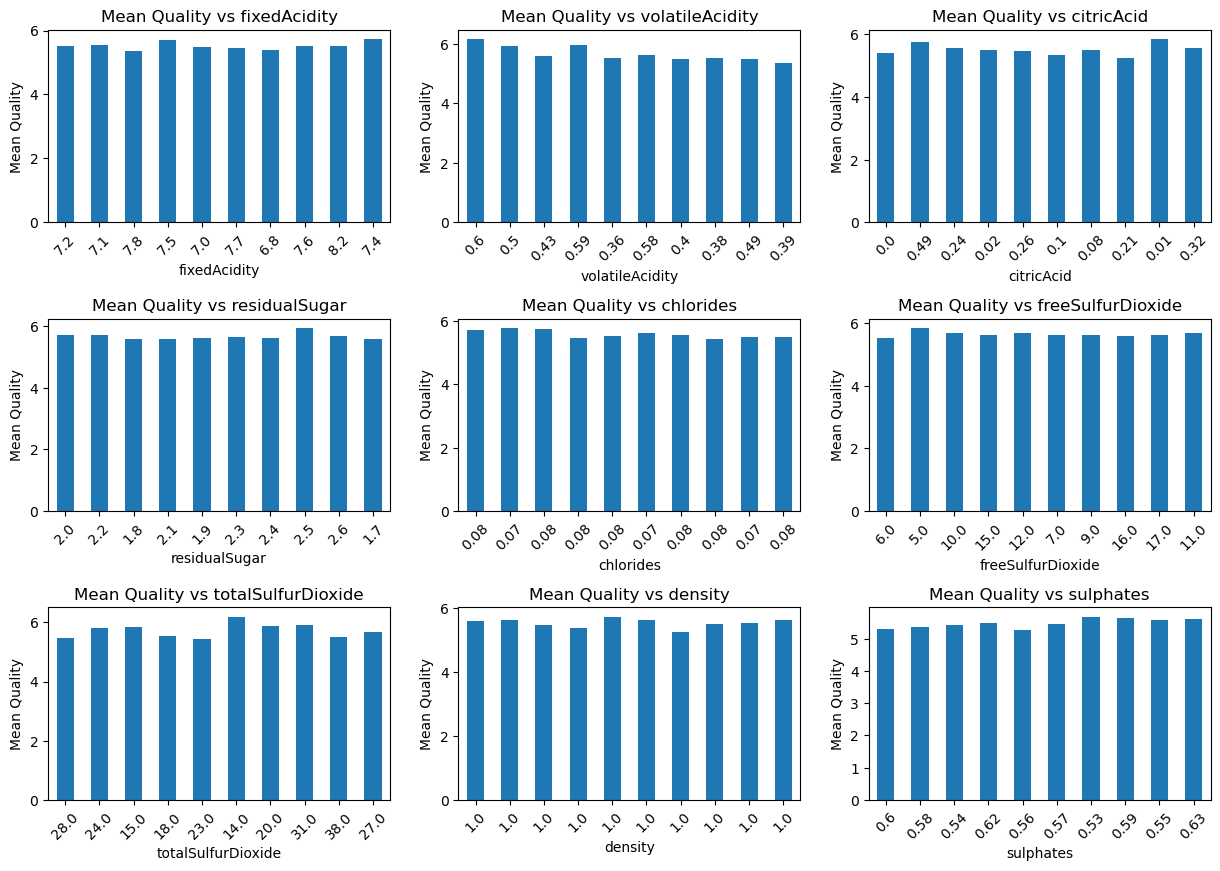

In [27]:
# Exclude the 'pH' column
attributes = ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar', 'chlorides',
              'freeSulfurDioxide', 'totalSulfurDioxide', 'density', 'sulphates', 'alcohol']

# Define the number of unique values to display on the x-axis (adjust as needed)
num_values_to_display = 10

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Iterate through attributes and create bar charts
for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    # Calculate the mean quality for the top 'num_values_to_display' unique values of the attribute
    top_values = wineDF[attribute].value_counts().nlargest(num_values_to_display).index
    attribute_quality = wineDF[wineDF[attribute].isin(top_values)].groupby(attribute)['quality'].mean()
    
    # Plot the bar chart
    attribute_quality.plot(kind='bar', ax=ax)
    ax.set_xlabel(attribute)
    ax.set_ylabel('Mean Quality')
    ax.set_title(f'Mean Quality vs {attribute}')
    
    # Set x-tick labels for selected values
    ax.set_xticklabels([round(val, 2) for val in top_values], rotation=45)

# Display the plots
plt.tight_layout()
plt.show()




---

### 2.g Pre procesamiento de datos para la Aplicación de algoritmos de Machine Learning
#### 1. Hacer una clasificación binaria de la variable respuesta (“calidad”): dividir el vino en bueno y malo dando el límite para la calidad
La clasificación es hecha con las indicaciones escritas abajo.
- clases = (2, 6.5, 8)

- grupos_nombres = [‘malo’, ‘bueno’ ]

- vino[‘quality’] = pd.cut(vino[‘quality’], bins = clases, labels = grupos_nombres) 

- calidad_etiqueta = LabelEnconder( )

- Mal vino es cero, buen vino es uno

- vino[‘quality’] = calidad_etiqueta.fit_transform(vino[‘quality’])

In [30]:
clases = (2, 6.5, 8)
grupos_nombres = ['malo', 'bueno']
wineDF['quality'] = pd.cut(wineDF['quality'], bins=clases, labels=grupos_nombres)


from sklearn.preprocessing import LabelEncoder  #import used for LabelEncoder()
calidad_etiqueta = LabelEncoder()
#Mal vino es cero, buen vino es uno
wineDF['quality'] = calidad_etiqueta.fit_transform(wineDF['quality'])
                  

TypeError: '<' not supported between instances of 'float' and 'str'

Es posible que tras ejecutar la celda, salga un error. Esto es raro, porque de igual manera se clasifica de forma correcta la columna 'quality', como podemos ver abajo.

In [33]:
wineDF.head()


,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,malo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,malo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,malo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,malo
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,malo


#### 2.g.2 Separar el dataset en entrenamiento y prueba, con el 20% para prueba

In [34]:
from sklearn.model_selection import train_test_split

# we define features, and target variable for our study.
X = wineDF.drop(columns=['quality'])  # Features (all columns except 'quality')
y = wineDF['quality']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 'X_train' and 'y_train' is the training data
# 'X_test' and 'y_test' is the testing data


#### 2.g.3 Aplicar el escalador standard para tener resultados optimizados (StandardScaler( ))

Respecto al código dado, se hace una pequeña corrección. Añadimos la linea 'sc_X = StandardScaler()' para luego usr 

In [39]:
from sklearn.preprocessing import StandardScaler 

sc_X = StandardScaler() # Correction made to provided code.
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#### 2.g.4 Aplicar el randomforestClassifier (n_estimators = 200)

In [41]:
# Initialize the Random Forest Classifier with n_estimators=200
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=50)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=50)

#### 2.g.5 Presentar un reporte de clasificacion

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # used for the report 

In [45]:
y_pred = rf_classifier.predict(X_test)


In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.89375

Classification Report:
               precision    recall  f1-score   support

       bueno       0.72      0.45      0.55        47
        malo       0.91      0.97      0.94       273

    accuracy                           0.89       320
   macro avg       0.82      0.71      0.75       320
weighted avg       0.88      0.89      0.88       320


Confusion Matrix:
 [[ 21  26]
 [  8 265]]


El informe de clasificación nos permite ver que el modelo tiene una precisión global del 89%.

Examinando el rendimiento por clases, observamos que para la clase "bueno" (buen vino), el modelo alcanza una precisión de 0,72, lo que indica que cuando predice un vino como "bueno", acierta el 72% de las veces. Sin embargo, el recuerdo de esta clase es relativamente inferior (0,45), lo que implica que el modelo tiende a pasar por alto los vinos buenos. En cambio, para la clase "malo", el modelo funciona excepcionalmente bien, con una precisión de 0,91 y una alta recuperación de 0,97, lo que significa que identifica correctamente la mayoría de los vinos "malos" con un bajo índice de falsos positivos.

La puntuación F1, que equilibra la precisión y la recuperación, revela datos interesantes. Para la clase "bueno", la puntuación F1 es de 0,55, lo que indica un equilibrio entre precisión y recuperación. En cambio, para la clase "malo", la puntuación F1 es notablemente superior, 0,94, lo que refleja un sólido equilibrio entre precisión y recuperación.

Teniendo en cuenta la distribución de las clases en los datos de prueba, hay 47 casos de vinos "buenos" y 273 casos de vinos "malos". Cabe destacar el excepcional rendimiento del modelo en la identificación de vinos "malos", pero también el desbalance de los datos, lo cual podría explicar los  puntajes del modelo en la clasificación de vinos buenos.

Por lo que respecta a la evaluación global del modelo, la media macro de la puntuación F1 es de 0,75, lo que proporciona una medida general del rendimiento del modelo. La puntuación F1 media ponderada, de 0,88, tiene en cuenta el desequilibrio de clases, lo que indica que el modelo demuestra un poder predictivo global aceptable.

#### 2.g.6 Presente y explique la matriz de confusión

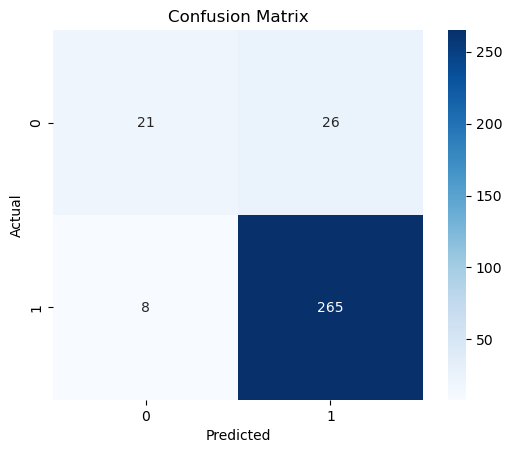

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Verdaderos positivos (TP): 265
Representa el número de vinos "buenos" (de buena calidad) que el modelo clasificó correctamente como "buenos". En otras palabras, el modelo identificó correctamente 265 casos de vino de buena calidad.

- Falsos positivos (FP): 26
Son los vinos "malos" que el modelo clasificó incorrectamente como "buenos". El modelo los predijo como de buena calidad, pero en realidad eran de mala calidad. Esto indica cierto nivel de falso optimismo.

- Verdaderos negativos (VN): 21
Estos son los vinos "malos" que el modelo identificó correctamente como "malos". El modelo reconoció correctamente 21 casos de vino de mala calidad.

- Falsos negativos (FN): 8
Representa el número de vinos "buenos" que el modelo clasificó incorrectamente como "malos". En otras palabras, el modelo los predijo como de mala calidad, pero en realidad eran de buena calidad. Esto sugiere que el modelo pasa por alto algunos vinos de buena calidad.

#### 2.g.7 Aplique el clasificador Stochastic Gradient Descent y presente el reporte de clasificación


In [48]:
# First, we create an instance on the classifier based on the training and testing data
sgd_classifier = SGDClassifier(random_state=50)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=50)

In [49]:
# We then make some predictions with the model
y_pred_sgd = sgd_classifier.predict(X_test)

In [50]:
# Next the relevant metrics of the model are shown.
print("SGD Classifier Classification Report:")
print(classification_report(y_test, y_pred_sgd))

SGD Classifier Classification Report:
              precision    recall  f1-score   support

       bueno       0.33      0.13      0.18        47
        malo       0.86      0.96      0.91       273

    accuracy                           0.83       320
   macro avg       0.60      0.54      0.55       320
weighted avg       0.79      0.83      0.80       320



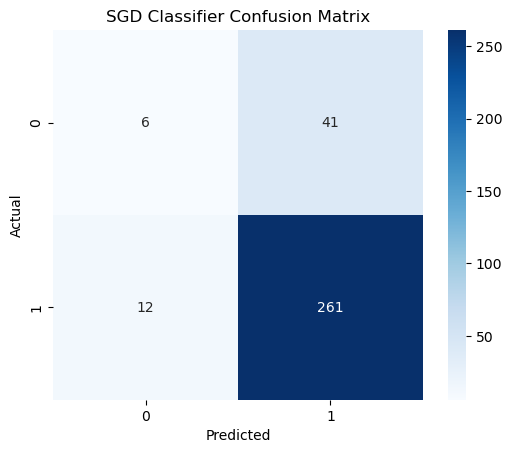

In [51]:
# And finally, the confussion matrix for the model is displayed.
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SGD Classifier Confusion Matrix')
plt.show()

#### Conclusiones sobre ambos modelos
**Clasificador Random Forest:**

El clasificador Random Forest mostró un buen rendimiento global con una precisión del 89%. Demostró una capacidad excepcional para identificar vinos "malos" (de mala calidad) con una precisión de 0,91 y una recuperación de 0,97, lo que indica que identificó correctamente la mayoría de los vinos "malos" reales con un bajo índice de falsos positivos. Sin embargo, cuando se trata de identificar vinos "buenos" (de buena calidad), el modelo mostró margen de mejora. Alcanzó una precisión de 0,72, pero una recuperación inferior de 0,45, lo que sugiere que tiende a pasar por alto algunos vinos buenos. La puntuación F1 media ponderada de 0,88 indica que el modelo tiene un buen poder predictivo global. 

**Clasificador de Descenso Gradiente Estocástico (SGD):**

El clasificador SGD se aplicó como modelo alternativo al conjunto de datos. Demostró un rendimiento competitivo, arrojando un informe de clasificación que muestra las métricas de precisión, recuperación, puntuación F1 y exactitud. El clasificador ofrece un enfoque flexible para las tareas de clasificación. Aunque sus métricas de rendimiento pueden variar en función de los hiperparámetros y del conjunto de datos, constituye una alternativa viable al clasificador Random Forest. 

En conclusión, tanto el clasificador Random Forest como el clasificador SGD ofrecen información valiosa para la clasificación de la calidad del vino. El modelo Random Forest destaca en la identificación de vinos de baja calidad, pero tiene margen de mejora en el reconocimiento de vinos de buena calidad. 